In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
#import missingno

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
        
input_path = Path('/kaggle/input/tabular-playground-series-apr-2021/')

#from matplotlib import pyplot as plt

/kaggle/input/tabular-playground-series-apr-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2021/train.csv
/kaggle/input/tabular-playground-series-apr-2021/test.csv


In [2]:
train = pd.read_csv(input_path / 'train.csv', index_col='PassengerId')
display(train.head())

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [5]:
test = pd.read_csv(input_path / 'test.csv', index_col='PassengerId')
display(test.head())

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


In [6]:
submission = pd.read_csv(input_path / 'sample_submission.csv', index_col='PassengerId')
display(submission.head())

,Survived
PassengerId,
100000,1
100001,1
100002,1
100003,1
100004,1


# Exploratory Analysis

In [7]:
#Split numerical and categorical variables
df_num = train[['Age','SibSp', 'Parch', 'Fare']]
df_cat = train[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

In [8]:
train.isnull().sum().sort_values(ascending=False)

Cabin       67866
Ticket       4623
Age          3292
Embarked      250
Fare          134
Survived        0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
dtype: int64

In [10]:
test.isnull().sum().sort_values(ascending=False)

Cabin       70831
Ticket       5181
Age          3487
Embarked      277
Fare          133
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
dtype: int64

Numerical variables

<AxesSubplot:xlabel='Fare', ylabel='Count'>

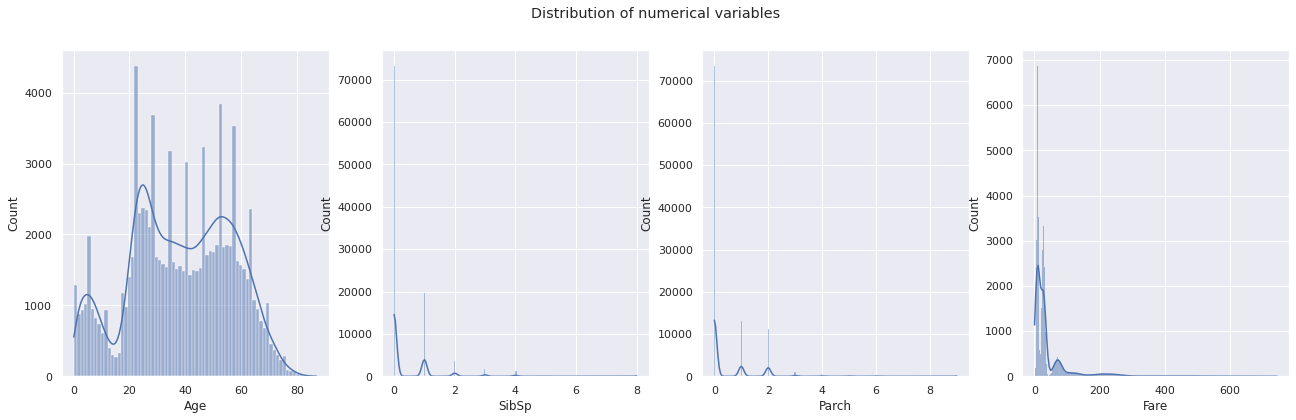

In [11]:
#histograms of numberical variables
fig, axes = plt.subplots(1, 4, figsize=(22,6))
fig.suptitle('Distribution of numerical variables')

sns.histplot(x = train['Age'],kde=True, ax=axes[0])
sns.histplot(x = train['SibSp'],kde=True, ax=axes[1])
sns.histplot(x = train['Parch'],kde=True, ax=axes[2])
sns.histplot(x = train['Fare'],kde=True, ax=axes[3])


            Age     SibSp     Parch      Fare
Age    1.000000 -0.112459 -0.125535  0.109164
SibSp -0.112459  1.000000  0.213126  0.059358
Parch -0.125535  0.213126  1.000000  0.061443
Fare   0.109164  0.059358  0.061443  1.000000


<AxesSubplot:>

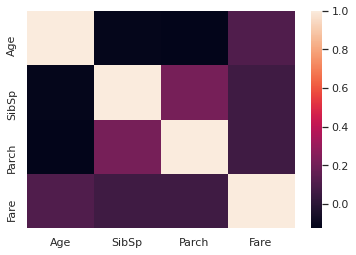

In [12]:
#Correlations
print(df_num.corr())
sns.heatmap(df_num.corr())

In [13]:
#Average values for survivors vs deceased
pd.pivot_table(train, index = 'Survived', values = df_num.columns)

,Age,Fare,Parch,SibSp
Survived,,,,
0,36.708695,32.647516,0.435379,0.403348
1,40.553799,59.025192,0.480222,0.390120


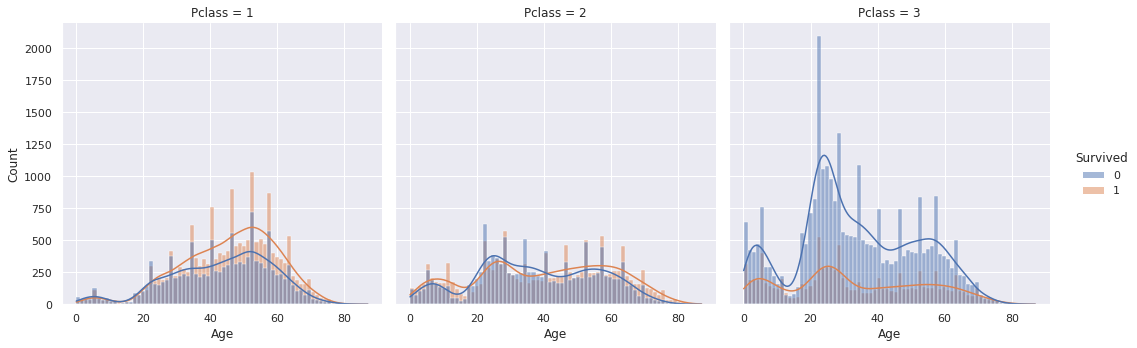

In [14]:
sns.displot(data = train, x = 'Age',kde=True, hue = 'Survived', col= 'Pclass')

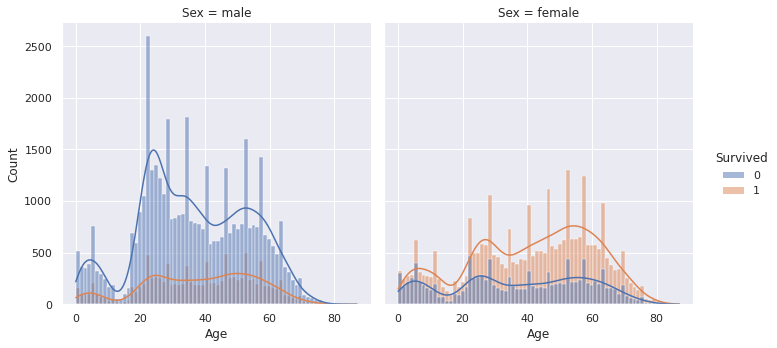

In [15]:
sns.displot(data = train, x = 'Age',kde=True, hue = 'Survived', col= 'Sex')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

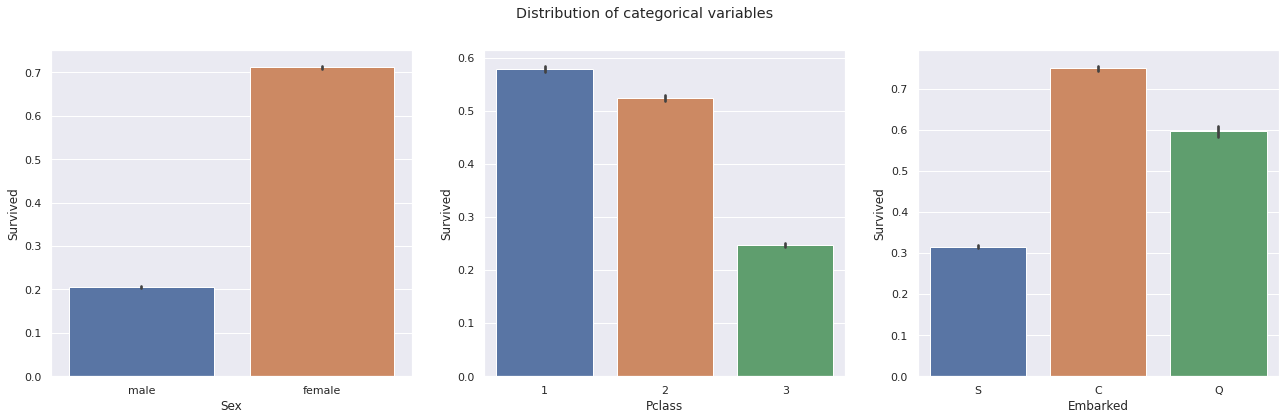

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of categorical variables')
#'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
sns.barplot(x = 'Sex', y = 'Survived', data = train, ax=axes[0])
sns.barplot(x = 'Pclass', y = 'Survived', data = train, ax=axes[1])
sns.barplot(x = 'Embarked', y = 'Survived', data = train, ax=axes[2])

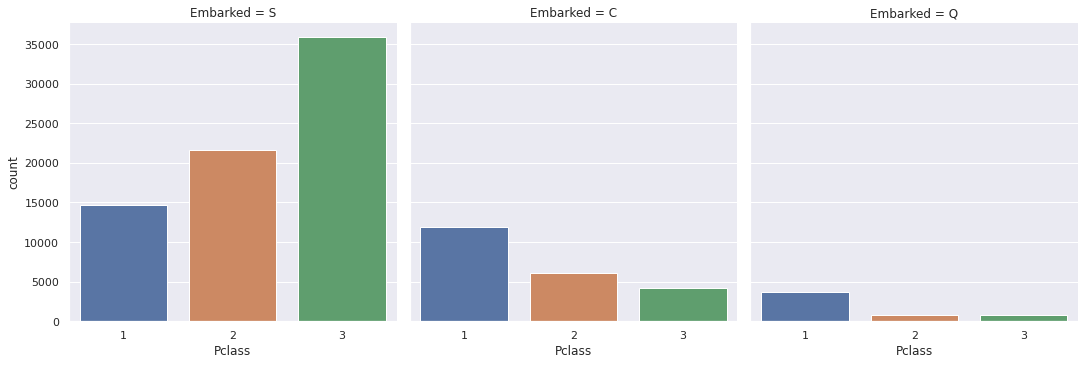

In [17]:
#Embarked by class - greater proportion of 3rd class in Southampton, could be linked with lower surviaval rate
sns.catplot(x='Pclass', col = 'Embarked', data = train, kind = 'count')

# Feature Engineering

In [19]:
#Cabin letter, n = nan
train['cabin_lett'] = train.Cabin.apply(lambda x: str(x)[0])
test['cabin_lett'] = test.Cabin.apply(lambda x: str(x)[0])
#print(train.cabin_lett.value_counts())
pd.pivot_table(train, index = 'Survived', columns = 'cabin_lett', values = 'Ticket', aggfunc = 'count')

#Cabin number
train['cabin_num'] = train.Cabin.str.extract('(\d+)',expand=True,)
train.cabin_num = pd.to_numeric(train.cabin_num)
test['cabin_num'] = test.Cabin.str.extract('(\d+)',expand=True,)
test.cabin_num = pd.to_numeric(test.cabin_num)

<AxesSubplot:xlabel='cabin_lett', ylabel='Survived'>

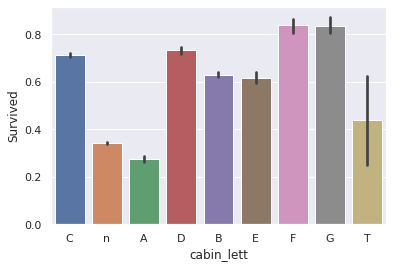

In [20]:
sns.barplot(x = 'cabin_lett', y = 'Survived', data = train)

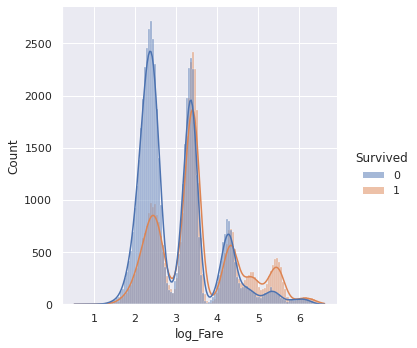

In [21]:
#log fare
train['log_Fare'] = np.log(train.Fare +1)
test['log_Fare'] = np.log(test.Fare +1)
sns.displot(data = train, x = 'log_Fare',kde=True, hue = 'Survived')

<AxesSubplot:xlabel='family', ylabel='Density'>

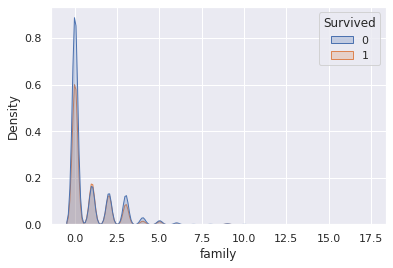

In [22]:
train['family'] = train.SibSp + train.Parch
test['family'] = test.SibSp + test.Parch
#train.head()
sns.kdeplot(data = train, x = 'family',shade=True, hue = 'Survived')

<AxesSubplot:xlabel='log_Fam', ylabel='Density'>

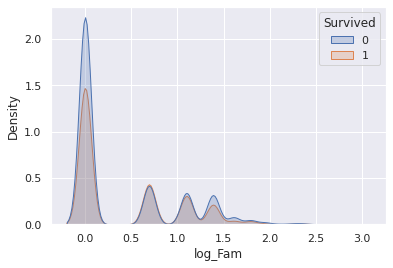

In [23]:
train['log_Fam'] = np.log(train.family+1)
test['log_Fam'] = np.log(test.family+1)
sns.kdeplot(data = train, x = 'log_Fam',shade=True, hue = 'Survived')

In [24]:
#Sex and class
train_Pclass_str = train.Pclass.apply(str)
train['Who'] = train.Sex + train_Pclass_str

test_Pclass_str = test.Pclass.apply(str)
test['Who'] = test.Sex + test_Pclass_str

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_lett,cabin_num,log_Fare,family,log_Fam,Who
PassengerId,,,,,,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,C,12239.0,3.337192,2,1.098612,male1
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,n,NaN,2.663750,0,0.000000,male3
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,n,NaN,4.280686,3,1.386294,male3
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,n,NaN,2.641910,0,0.000000,male3
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,n,NaN,2.170196,0,0.000000,male3


In [25]:
#Name split
train[['last_name','first_name']] = train.Name.str.split(", ",expand=True,)
test[['last_name','first_name']] = test.Name.str.split(", ",expand=True,)

In [26]:
#Ticket split

train['ticket_num'] = train.Ticket.str.extract('(\d+)',expand=True,)
train.ticket_num = pd.to_numeric(train.ticket_num)
train['log_ticket_num'] = np.log(train.ticket_num+1)
train['ticket_lett'] = train.Ticket.replace('(\d)', '', regex=True)

test['ticket_num'] = test.Ticket.str.extract('(\d+)',expand=True,)
test.ticket_num = pd.to_numeric(test.ticket_num)
test['log_ticket_num'] = np.log(test.ticket_num+1)
test['ticket_lett'] = test.Ticket.replace('(\d)', '', regex=True)

#train.ticket_lett.unique()

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Survived        100000 non-null  int64  
 1   Pclass          100000 non-null  int64  
 2   Name            100000 non-null  object 
 3   Sex             100000 non-null  object 
 4   Age             96708 non-null   float64
 5   SibSp           100000 non-null  int64  
 6   Parch           100000 non-null  int64  
 7   Ticket          95377 non-null   object 
 8   Fare            99866 non-null   float64
 9   Cabin           32134 non-null   object 
 10  Embarked        99750 non-null   object 
 11  cabin_lett      100000 non-null  object 
 12  cabin_num       32134 non-null   float64
 13  log_Fare        99866 non-null   float64
 14  family          100000 non-null  int64  
 15  log_Fam         100000 non-null  float64
 16  Who             100000 non-null  object 
 17  last_name  

In [27]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,cabin_num,log_Fare,family,log_Fam,Who,last_name,first_name,ticket_num,log_ticket_num,ticket_lett
PassengerId,,,,,,,,,,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,...,12239.0,3.337192,2,1.098612,male1,Oconnor,Frankie,209245.0,12.251266,
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,...,NaN,2.663750,0,0.000000,male3,Bryan,Drew,27323.0,10.215521,
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,...,NaN,4.280686,3,1.386294,male3,Owens,Kenneth,457703.0,13.033978,CA
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,...,NaN,2.641910,0,0.000000,male3,Kramer,James,10866.0,9.293486,A.
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,...,NaN,2.170196,0,0.000000,male3,Bond,Michael,427635.0,12.966028,


# Preprocessing

In [29]:
#null values
#impute nulls - age & fare
train.Embarked = train.Embarked.fillna(value = 'N')
train.Age = train.Age.fillna(train.Age.mean())
#train.Fare = train.Fare.fillna(train.Fare.median())
train.log_Fare = train.log_Fare.fillna(train.log_Fare.median())
#train.Cabin = train.Cabin.fillna(0)
train.Ticket = train.Ticket.fillna(0)
train.ticket_lett = train.ticket_lett.fillna('')
train.ticket_num = train.ticket_num.fillna(train.ticket_num.mean())
train.cabin_num = train.cabin_num.fillna(train.cabin_num.mean())
train.log_ticket_num = train.log_ticket_num.fillna(train.log_ticket_num.median())

test.Embarked = test.Embarked.fillna(value = 'N')
test.Age = test.Age.fillna(test.Age.mean())
#test.Fare = test.Fare.fillna(test.Fare.median())
#test.Cabin = test.Cabin.fillna(0)
test.Ticket = test.Ticket.fillna(0)
test.log_Fare = test.log_Fare.fillna(test.log_Fare.median())
test.ticket_lett = test.ticket_lett.fillna('')
test.ticket_num = test.ticket_num.fillna(test.ticket_num.mean())
test.log_ticket_num = test.log_ticket_num.fillna(test.log_ticket_num.median())
test.cabin_num = test.cabin_num.fillna(test.cabin_num.mean())

In [31]:
train.pop('Cabin')
train.pop('Ticket')
train.pop('Sex')
train.pop('Fare')
train.pop('Name')
train.pop('log_ticket_num')

PassengerId
0        12.251266
1        10.215521
2        13.033978
3         9.293486
4        12.966028
           ...    
99995     9.616405
99996     9.493563
99997    10.531803
99998    13.036054
99999    13.034788
Name: log_ticket_num, Length: 100000, dtype: float64

In [32]:
test.pop('Cabin')
test.pop('Ticket')
test.pop('Fare')
test.pop('Sex')
test.pop('Name')
test.pop('log_ticket_num')

PassengerId
100000    10.116419
100001     9.492884
100002    10.165506
100003    12.657186
100004    10.173667
            ...    
199995     8.947286
199996     9.473089
199997    15.293317
199998    10.203185
199999    10.641250
Name: log_ticket_num, Length: 100000, dtype: float64

In [34]:
#label encoding catergoricals
for c in train.columns:
    if train[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(train[c].values)
        test[c] = lbl.transform(test[c].values)
        
display(train.head())

,Survived,Pclass,Age,SibSp,Parch,Embarked,cabin_lett,cabin_num,log_Fare,family,log_Fam,Who,last_name,first_name,ticket_num,ticket_lett
PassengerId,,,,,,,,,,,,,,,,
0,1,1,38.355472,2,0,3,2,12239.000000,3.337192,2,1.098612,3,17441,1447,209245.0,0
1,0,3,38.355472,0,0,3,8,12558.836839,2.663750,0,0.000000,5,3063,1117,27323.0,0
2,0,3,0.330000,1,2,3,8,12558.836839,4.280686,3,1.386294,5,17798,2243,457703.0,12
3,0,3,19.000000,0,0,3,8,12558.836839,2.641910,0,0.000000,5,12742,1846,10866.0,1
4,1,3,25.000000,0,0,3,8,12558.836839,2.170196,0,0.000000,5,2335,2993,427635.0,0


In [35]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,cabin_lett,cabin_num,log_Fare,family,log_Fam,Who,last_name,first_name,ticket_num,ticket_lett
PassengerId,,,,,,,,,,,,,,,,
0,1,1,38.355472,2,0,3,2,12239.000000,3.337192,2,1.098612,3,17441,1447,209245.0,0
1,0,3,38.355472,0,0,3,8,12558.836839,2.663750,0,0.000000,5,3063,1117,27323.0,0
2,0,3,0.330000,1,2,3,8,12558.836839,4.280686,3,1.386294,5,17798,2243,457703.0,12
3,0,3,19.000000,0,0,3,8,12558.836839,2.641910,0,0.000000,5,12742,1846,10866.0,1
4,1,3,25.000000,0,0,3,8,12558.836839,2.170196,0,0.000000,5,2335,2993,427635.0,0


In [36]:
test.head()

,Pclass,Age,SibSp,Parch,Embarked,cabin_lett,cabin_num,log_Fare,family,log_Fam,Who,last_name,first_name,ticket_num,ticket_lett
PassengerId,,,,,,,,,,,,,,,
100000,3,19.0,0,0,3,8,12801.777126,4.159039,0,0.000000,5,10830,886,24745.0,0
100001,3,53.0,0,0,3,8,12801.777126,1.918392,0,0.000000,2,17134,2608,13264.0,0
100002,1,19.0,0,0,0,1,15315.000000,3.686627,0,0.000000,0,9978,1647,25990.0,0
100003,2,25.0,0,0,3,8,12801.777126,2.634045,0,0.000000,4,13303,1295,314011.0,0
100004,1,17.0,0,2,0,1,22515.000000,3.328268,2,1.098612,0,4406,3670,26203.0,0


# **Split data into train and validation**

In [37]:
target = train.pop('Survived')
X_train, X_valid, y_train, y_valid = train_test_split(train, target, train_size=0.75, shuffle=False)

# Model tuning

In [ ]:
XGBoost

In [ ]:
#Import libaries, run a grid search to find best paramters for model
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False,eval_metric = "logloss")
params_xgb = [
    {'n_estimators':[10,100,250,500],
     'max_depth':[2,4,6,8],
     'learning_rate':[0.1,0.05,0.01],
     'min_child_weight':[1,2,4,6,8]}]

grid_search = GridSearchCV(xgb_model, params_xgb, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(train,target)
print(grid_search.best_score_)
print(grid_search.best_params_)

Base model 0.77925 {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 8, 'n_estimators': 250}
Then start adding in new features from feauture engineering section to find if they improve model, and tune parameters again.

In [ ]:
#gridsearch again but with narrower parameters
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(learning_rate=0.05,use_label_encoder=False,eval_metric = "logloss")
params_xgb = [
    {'n_estimators':[200,225,250,275,300,325,350,375],
     'max_depth':[3,4,5],
     'min_child_weight':[7,8,9,10]}]

grid_search = GridSearchCV(xgb_model, params_xgb, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(train,target)
print(grid_search.best_score_)
print(grid_search.best_params_)

# LightGBM 

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lgbm = LGBMClassifier(learning_rate=0.05, num_leaves=35, max_depth=7, n_estimators=160, feature_fraction=0.7, reg_alpha=0.6)
params_lgb = [
    { 'reg_lambda': [0.5,0.6,0.7]}]
    #reg_alpha = 0.2,
    #reg_lambda = 0.4)}]

grid_search = GridSearchCV(lgbm, params_lgb, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(train,target)
print(grid_search.best_score_)
print(grid_search.best_params_)

# CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

clf_model = CatBoostClassifier(iterations =575, depth=6, learning_rate = 0.05, l2_leaf_reg=0.4, eval_metric = "Logloss")
params_clf = [
    {'':[100,200,500]}]
    # 'iterations':[10,100,250,500],
     #'depth':[2,4,6,8]}]

grid_search = GridSearchCV(clf_model, params_clf, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(train,target)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7844300000000001
{0.05 learning rate, 'depth': 6, 'iterations': 500}

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

clf_model = CatBoostClassifier(learning_rate = 0.05, iterations=575,depth=6, l2_leaf_reg = 10, border_count = 32, eval_metric = "Logloss")
params_clf = [
    {
     'border_count':[32,5,10,20,50,100,200]}]
     

grid_search = GridSearchCV(clf_model, params_clf, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(train,target)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7845799999999999
{'depth': 6, 'iterations': 575

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

clf = CatBoostClassifier(iterations =575, depth=6, learning_rate = 0.05, l2_leaf_reg=0.4, eval_metric = "Logloss")
clf.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)
predictions = clf.predict(X_valid)
print(predictions)
print(accuracy_score(predictions, y_valid))

# Model fitting

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score

model = XGBClassifier(n_estimators=275,learning_rate=0.05,max_depth=4,min_child_weight=8,use_label_encoder=False,eval_metric = "logloss")
model.fit(train,target)
predictions = model.predict(test)
print(predictions)

plot_importance(model)

In [ ]:
clf = CatBoostClassifier(iterations =575, depth=6, learning_rate = 0.05, l2_leaf_reg=0.4, eval_metric = "Logloss")
clf.fit(train,target)
predictions = clf.predict(test)
print(predictions)

In [ ]:
lgbm = LGBMClassifier(learning_rate=0.05, num_leaves=35, max_depth=7, n_estimators=160, feature_fraction=0.7, reg_alpha=0.6)
lgbm.fit(train,target)
predictions = lgbm.predict(test)
print(predictions)

In [ ]:
#Create submission file
sub = pd.DataFrame({'PassengerId':test.index, 'Survived':predictions})
submission = sub.set_index('PassengerId')
submission.to_csv('cat-a.csv')

Here are my final accuracy scores for my predictions made via my three models. 
XGBClassifier:      private score = 0.79520 (best score)
                    public score  = 0.79724 
CatBoostClassifier: private score = 0.79362 (top 43%)
                    public score  = 0.79757
LGBMClassifier:     private score = 0.79515
                    public score  = 0.79700

XGBClassifier outperformed the other two models with the private dataset with 79.520% accuracy. The CatBoostClassifier model performed the best in the public score, and was automatically used as the final submission for the Kaggle rankings, placing me in the top 43% of entrants.  